# Ejercicios Práctica 1

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## Crear una imagen con la textura de un tablero de ajedrez


(800, 800, 1)


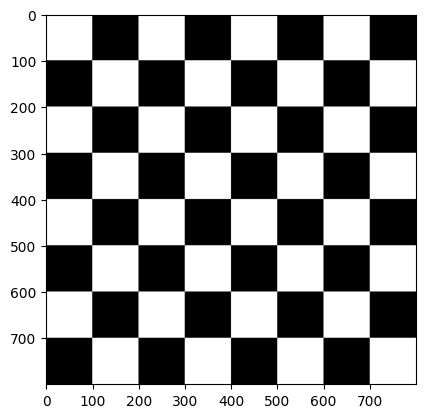

In [2]:

alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,1), dtype = np.uint8)

inicio_x = 0
inicio_y = 0

for x in range(0,ancho+100,100):
    for y in range(0,alto+100,100):
        if (y%200 != 0  and x%200 !=0) or (y%200 == 0  and x%200 ==0):
            color_img[inicio_y:y,inicio_x:x,0] = 255
            continue
        inicio_y = y
    inicio_x = x

print(color_img.shape)

plt.imshow(color_img, cmap="gray") 
plt.show()

## Crear una imagen estilo Mondrian 

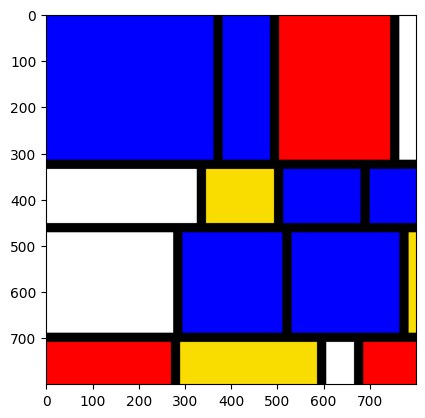

In [6]:
colors = [(255,0,0),(255,255,255),(0,0,255),(249, 220, 0)]
alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(50,ancho//4,1)[0]
random_alto = np.random.randint(50,alto//4,1)[0]

inicio_y = 0
gap = 20

for y in range(200,alto+100, 200):

    inicio_x = 0

    for x in range(200,ancho+100, 200):

        random_color = np.random.randint(0,4,1)[0]
        color_img[inicio_y:y+random_alto, inicio_x:x+random_ancho] = colors[random_color]
        inicio_x = x + random_ancho +gap
        random_ancho = np.random.randint(50,ancho/4,1)[0]

    inicio_y = y+ random_alto + gap
    random_alto = np.random.randint(50,alto/4,1)[0]

plt.imshow(color_img) 
plt.show()

## Hacer uso de las funciones de dibujo de OpenCV con el ejercicio Mondrian

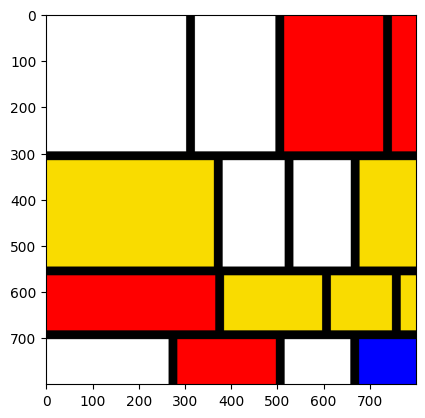

In [5]:
colors = [(255,0,0),(255,255,255),(0,0,255),(249, 220, 0)]
alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(50,ancho/4,1)[0]
random_alto = np.random.randint(50,alto/4,1)[0]

inicio_y = 0
gap = 20

for y in range(200,alto+100, 200):

    inicio_x = 0

    for x in range(200,ancho+100, 200):

        random_color = np.random.randint(0,4,1)[0]
        cv2.rectangle(color_img,(inicio_x,inicio_y),(x+ random_ancho,y+random_alto),colors[random_color],-1)
        inicio_x = x + random_ancho +gap
        random_ancho = np.random.randint(50,ancho/4,1)[0]

    inicio_y = y+ random_alto + gap
    random_alto = np.random.randint(50,alto/4,1)[0]

plt.imshow(color_img) 
plt.show()

## Modifica de forma libre los valores de un plano de la imagen

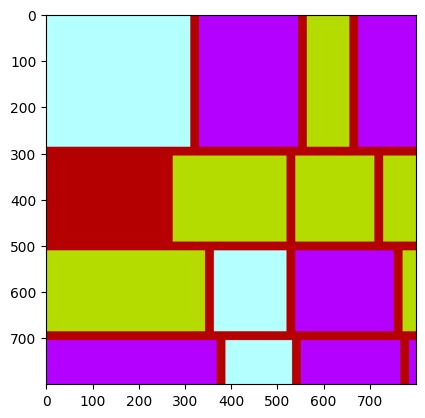

In [69]:
colors = [(255,0,0),(255,255,255),(0,0,255),(249, 220, 0)]
alto = 800
ancho = 800
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(50,ancho//4,1)[0]
random_alto = np.random.randint(50,alto//4,1)[0]

inicio_y = 0
gap = 20

for y in range(200,alto+100, 200):
    inicio_x = 0
    for x in range(200,ancho+100, 200):
        random_color = np.random.randint(0,4,1)[0]
        cv2.rectangle(color_img,(inicio_x,inicio_y),(x+ random_ancho,y+random_alto),colors[random_color],-1)
        inicio_x = x + random_ancho + gap
        random_ancho = np.random.randint(50,ancho//4,1)[0]
    inicio_y = y + random_alto + gap
    random_alto = np.random.randint(50,alto//4,1)[0]

# cambia el plano rojo a un valor aleatorio
color_img[:, :, 0] = np.random.randint(0, 256, 1)

plt.imshow(color_img) 
plt.show()


## Destacar tanto el píxel con el color más claro como con el color más oscuro de una imagen

## Propuesta pop art con la entrada de la cámara web o vídeo